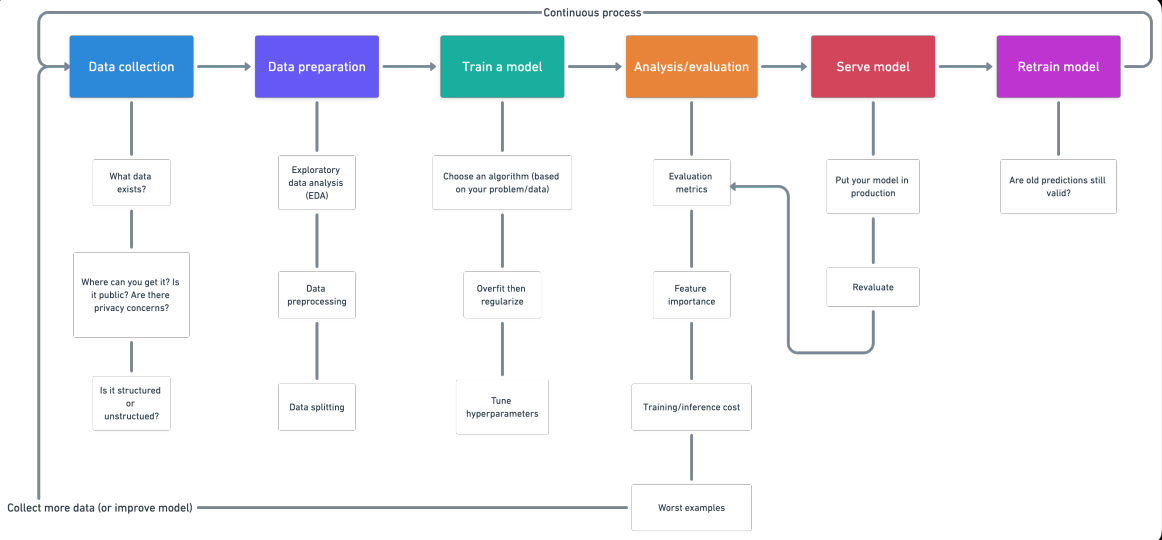

In [1]:
# assigns names for each feature in columns
names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors',
         'body_style','drive_wheels','engine_location','wheel_base','length','width',
         'height','curb_weight','engine_type','num_of_cylinders','engine_size',
         'fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm',
         'city_mpg','highway_mpg','price']



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = names)
car_df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
car_df.iloc[:len(car_df)*2/3]

TypeError: cannot do positional indexing on RangeIndex with these indexers [136.66666666666666] of type float

In [ ]:
%matplotlib inline

In [176]:
# informations about dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [177]:
car_df.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num_of_doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4


In [178]:
# replacing "?" wiht null
car_df.replace("?" , np.nan , inplace = True)

In [179]:
# checkin null
car_df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [180]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,NaN,NaN
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [182]:
car_df.asnumeric()

AttributeError: 'DataFrame' object has no attribute 'asnumeric'

In [183]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [184]:
car_df["make"] = car_df["make"].str.replace("-","")

In [185]:
car_df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [186]:
car_df["num_of_cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [187]:
car_df["num_of_cylinders"] = car_df["num_of_cylinders"].replace({"two":2,"three":3,"four":4,"five":5
                                                                ,"six":6,"eight":8,"two":2,"twelve":2})

In [188]:
car_df["num_of_doors"].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [189]:
car_df["num_of_doors"] = car_df["num_of_doors"].replace({"two":2,"four":4})

In [190]:
car_df.head(3).transpose()

,0,1,2
symboling,3,3,1
normalized_losses,NaN,NaN,NaN
make,alfaromero,alfaromero,alfaromero
fuel_type,gas,gas,gas
aspiration,std,std,std
num_of_doors,2.0,2.0,2.0
body_style,convertible,convertible,hatchback
drive_wheels,rwd,rwd,rwd
engine_location,front,front,front
wheel_base,88.6,88.6,94.5


In [191]:
# change datatype
for i in car_df.columns:
    car_df[i] = pd.to_numeric(car_df[i] , errors = "ignore")

In [192]:
car_df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [193]:
car_df_cat = car_df[["make","fuel_type","aspiration","body_style","drive_wheels","engine_location",
                     "fuel_system","engine_type"]]
car_df_num = car_df[["symboling","normalized_losses","num_of_doors","wheel_base",
                     "length","width","height","curb_weight","num_of_cylinders",
                     "engine_size","bore","stroke","compression_ratio","horsepower","peak_rpm"
                    ,"city_mpg","highway_mpg","price"]]
car_df_num

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,4.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,4.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,4.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,4.0,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [194]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized_losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
num_of_doors,203.0,3.123153,0.994841,2.00,2.00,4.00,4.00,4.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num_of_cylinders,205.0,4.331707,0.953435,2.00,4.00,4.00,4.00,8.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00


In [195]:
import statistics
 
car_df_num["normalized_losses"].fillna(statistics.mode(car_df_num["normalized_losses"]),inplace = True)
car_df_num["num_of_doors"].fillna(car_df_num["num_of_doors"].median(),inplace=True)
car_df_num["bore"].fillna(car_df_num["bore"].median(),inplace = True)
car_df_num["stroke"].fillna(car_df_num["stroke"].median(),inplace=True)
car_df_num["horsepower"].fillna(car_df_num["horsepower"].median(),inplace=True)
car_df_num["peak_rpm"].fillna(car_df_num["peak_rpm"].median(),inplace=True)
car_df_num["price"].fillna(car_df_num["price"].median(),inplace=True)


C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_32592\665627994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_num["normalized_losses"].fillna(statistics.mode(car_df_num["normalized_losses"]),inplace = True)
C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_32592\665627994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_num["num_of_doors"].fillna(car_df_num["num_of_doors"].median(),inplace=True)
C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_32592\665627994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [196]:
car_df_num.isnull().sum()

symboling            0
normalized_losses    0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [197]:

car_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   num_of_doors       205 non-null    float64
 3   wheel_base         205 non-null    float64
 4   length             205 non-null    float64
 5   width              205 non-null    float64
 6   height             205 non-null    float64
 7   curb_weight        205 non-null    int64  
 8   num_of_cylinders   205 non-null    int64  
 9   engine_size        205 non-null    int64  
 10  bore               205 non-null    float64
 11  stroke             205 non-null    float64
 12  compression_ratio  205 non-null    float64
 13  horsepower         205 non-null    float64
 14  peak_rpm           205 non-null    float64
 15  city_mpg           205 non-null    int64  
 16  highway_mpg        205 non

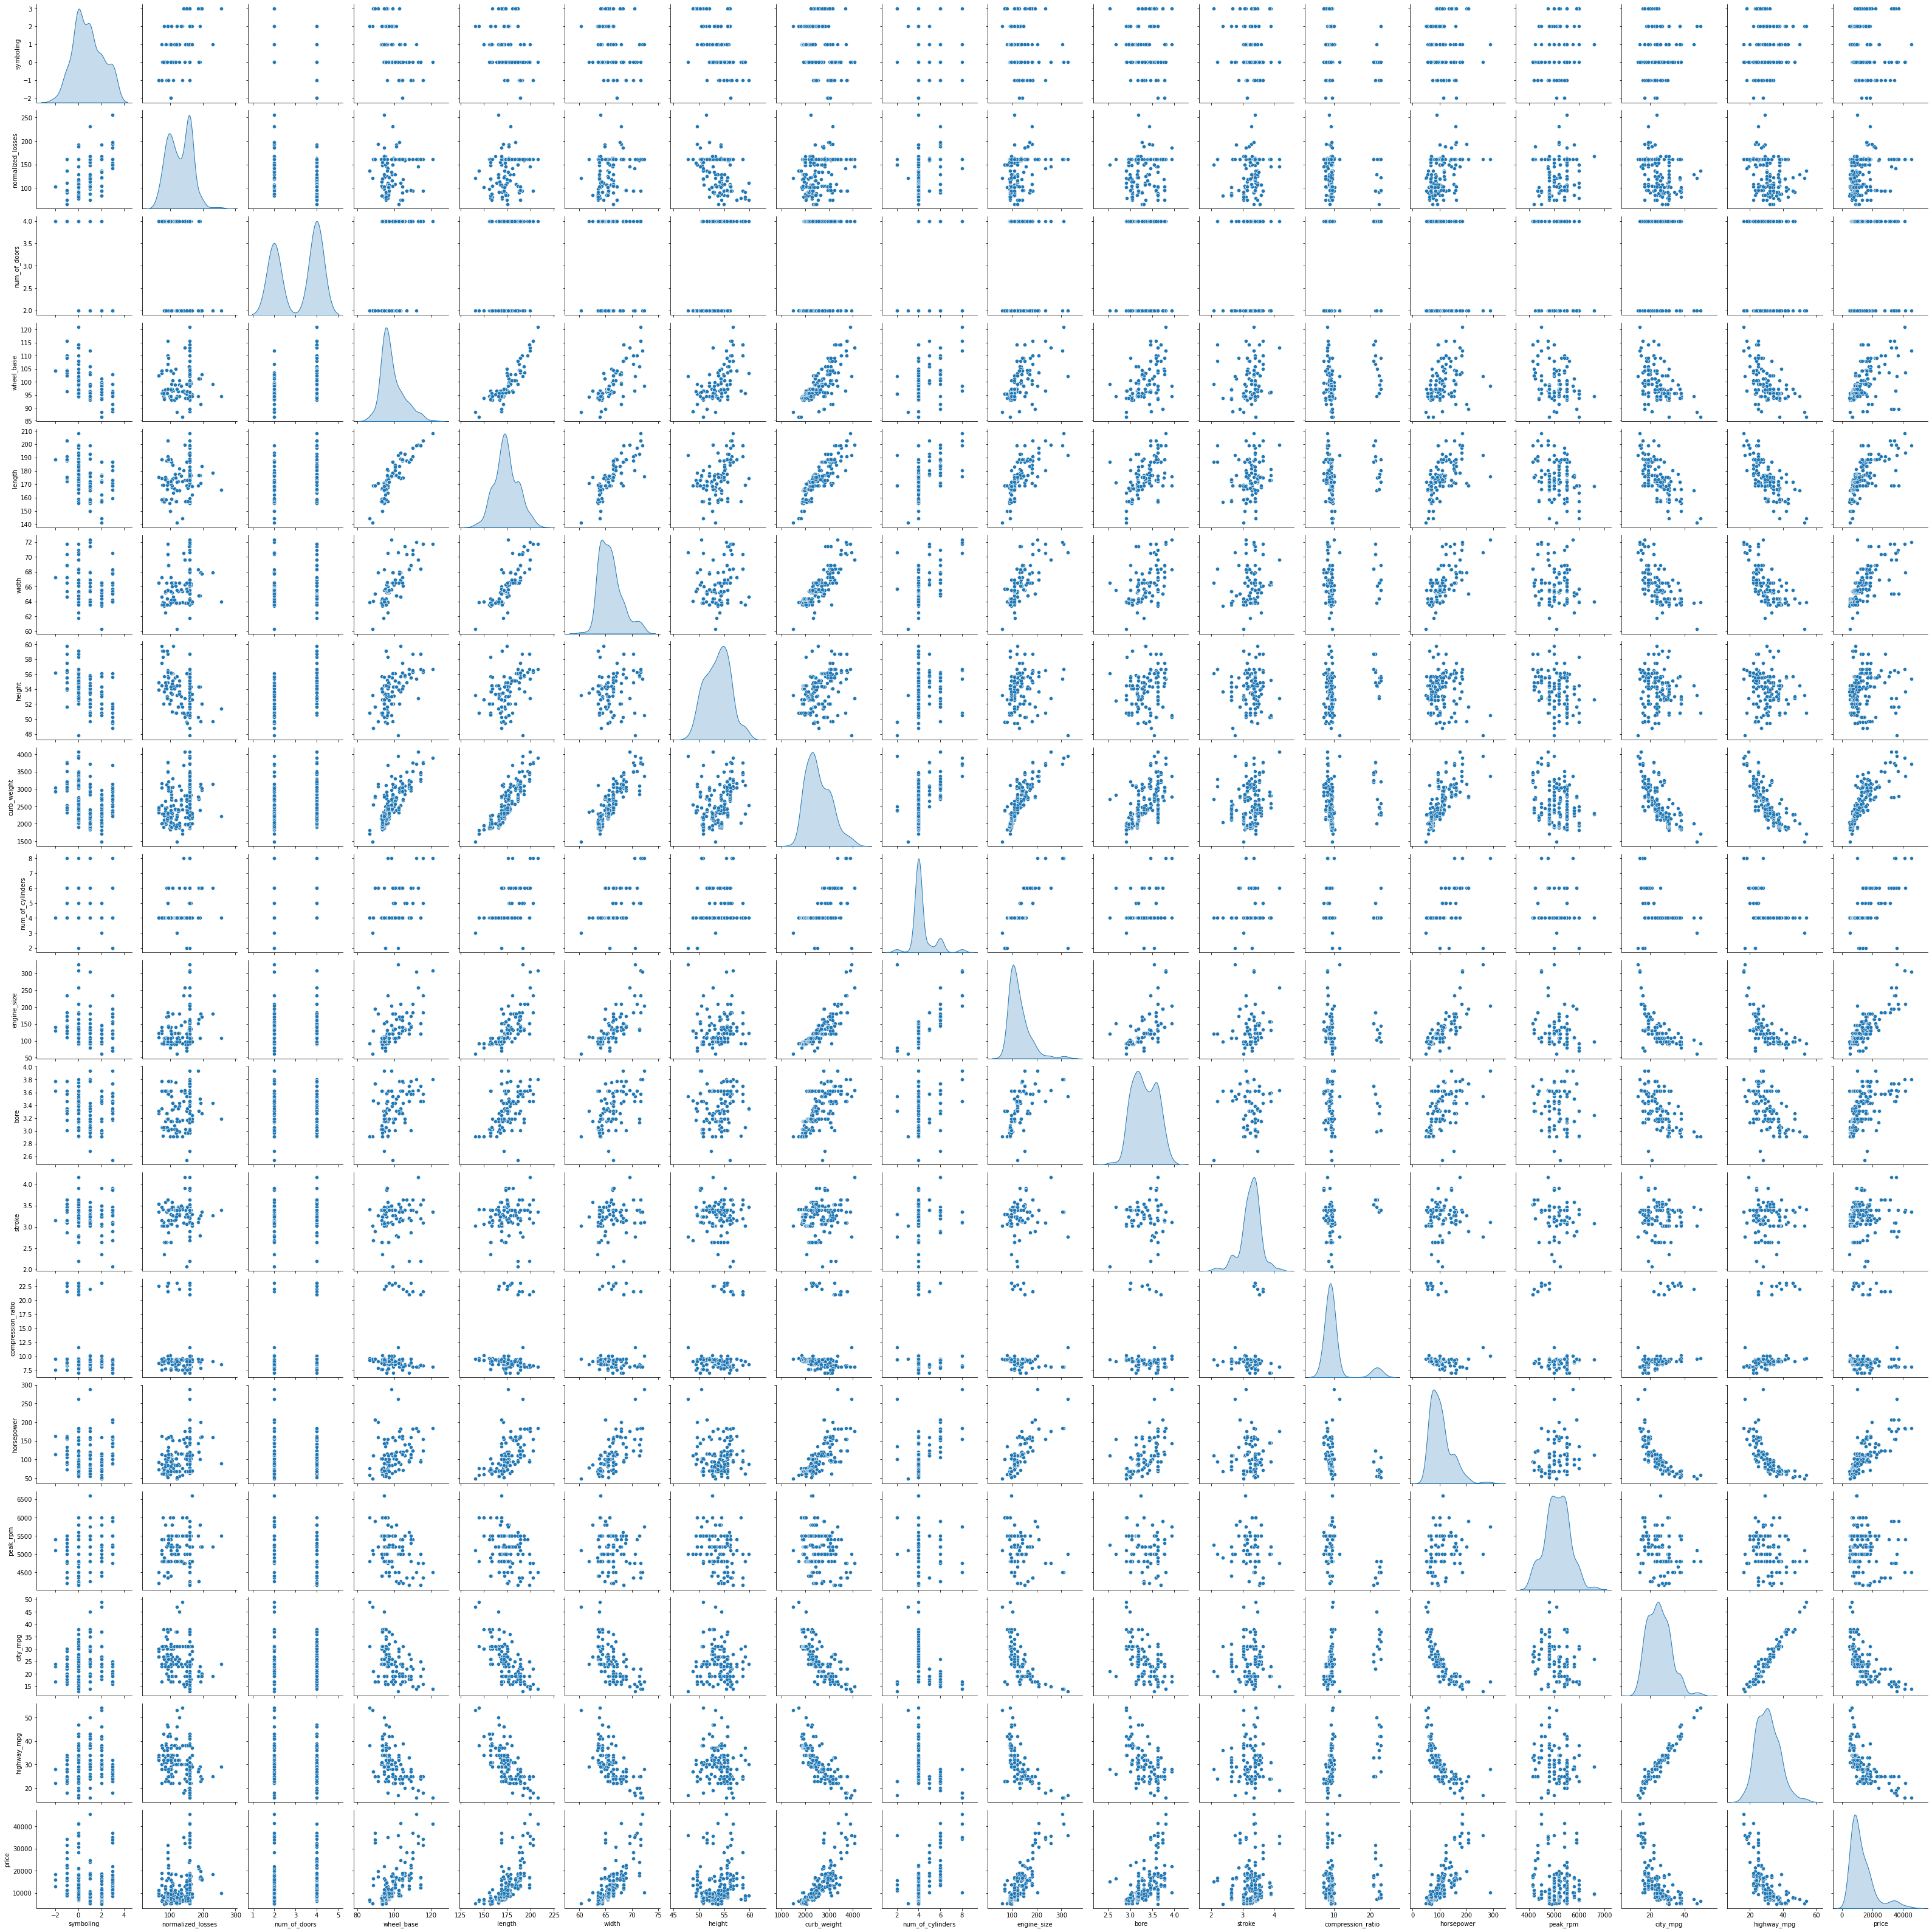

In [198]:
sns.pairplot(car_df_num , diag_kind = "kde")

In [199]:
# remove outliers
car_df_num_copy = car_df_num.copy()
car_df_num_copy



,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,161.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,161.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,161.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,4.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,4.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,4.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,4.0,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


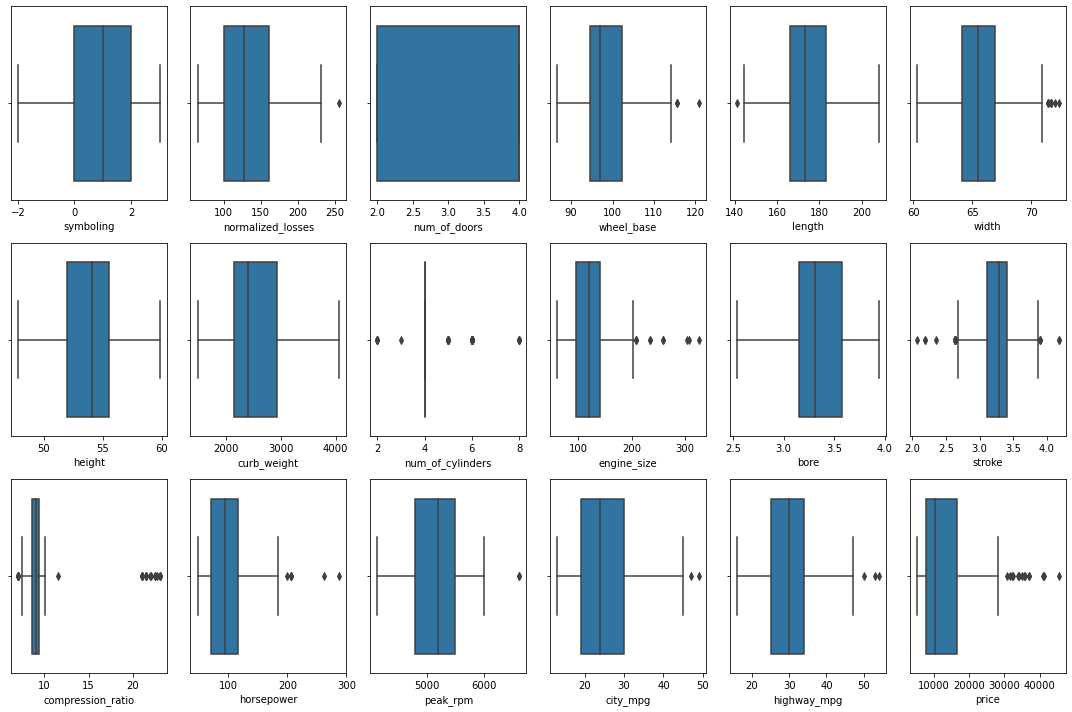

In [200]:
fig , ax = plt.subplots(3,6,figsize = (15,10))
car_df_num_copy_col = car_df_num_copy.columns
index = 0
for i in range(3):
    for j in range(6):
        sns.boxplot(data = car_df_num_copy,x = car_df_num_copy_col[index],ax = ax[i][j])
        index+=1
plt.tight_layout()

In [201]:
for i in car_df_num_copy.columns:
    if i == "num_of_cylinders":
        continue
    else:
        
        Q1 = car_df_num_copy[i].quantile(0.25)
        Q3 = car_df_num_copy[i].quantile(0.75)
        IQR = Q3-Q1
        car_df_num_copy = car_df_num_copy[(car_df_num_copy[i]>=(Q1-1.5*IQR)) & (car_df_num_copy[i]<=(Q3+1.5*IQR))]
 


In [202]:
car_df_num_copy  =car_df_num_copy.reset_index()

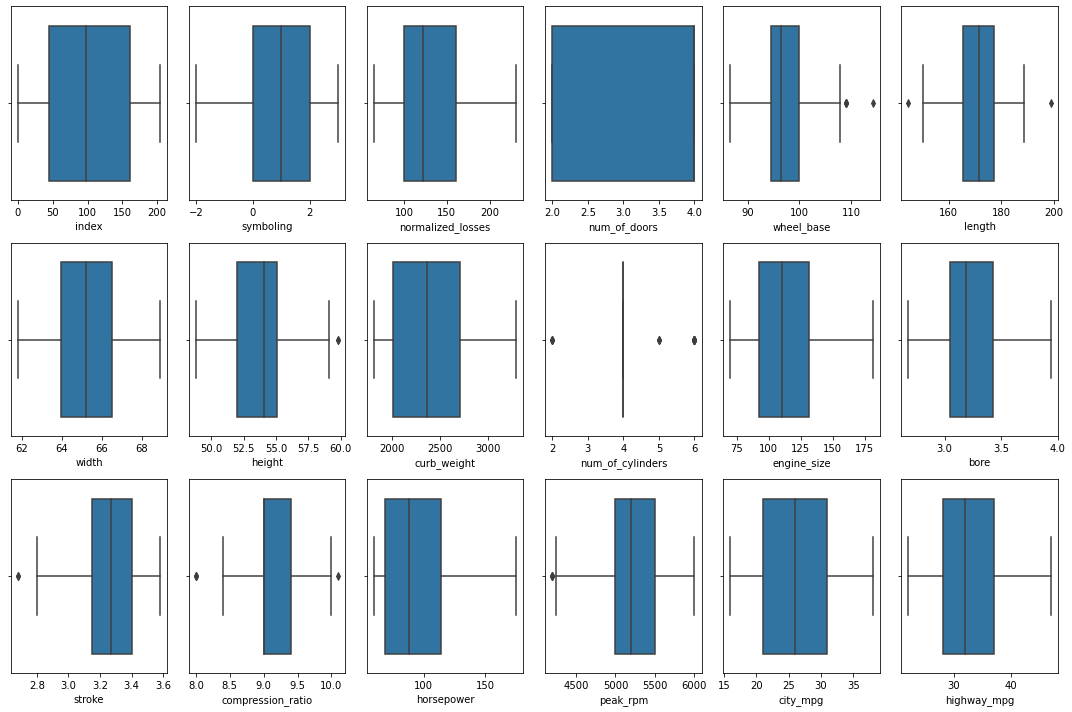

In [203]:
fig , ax = plt.subplots(3,6,figsize = (15,10))
car_df_num_copy_col = car_df_num_copy.columns
index = 0
for i in range(3):
    for j in range(6):
        sns.boxplot(data = car_df_num_copy,x = car_df_num_copy_col[index],ax = ax[i][j])
        index+=1
plt.tight_layout()

<AxesSubplot:>

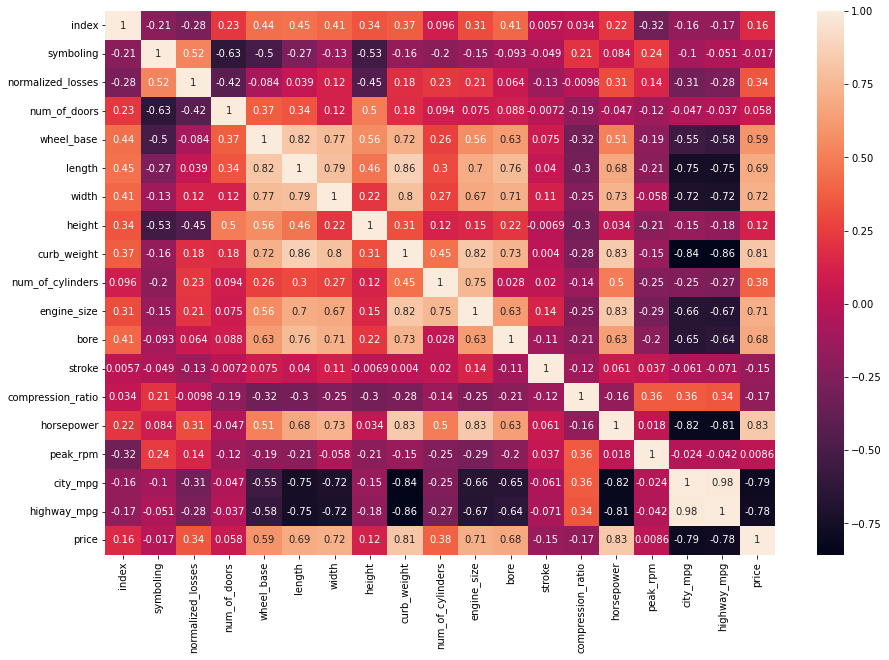

In [204]:
plt.subplots(figsize = (15,10))
sns.heatmap(car_df_num_copy.corr() , annot = True)

In [205]:
df_y = car_df_num_copy[["price"]]
df_x = car_df_num_copy.copy()

In [206]:
df_x = df_x.drop("price" , axis= 1)


In [207]:
df_x = df_x.drop("index" , axis=1)

In [208]:
df_x
df_y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
123,16515.0
124,16845.0
125,19045.0
126,21485.0


In [209]:
from sklearn.model_selection import train_test_split


In [210]:
x_train , x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.2,random_state=1)

In [211]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train , y_train)

LinearRegression()

In [212]:
print("The intercept is " , regression.intercept_)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression.coef_[0][idx]))

The intercept is  [-36268.4638379]
The coefficient for symboling is -573.4386909858349
The coefficient for normalized_losses is 15.766027338739189
The coefficient for num_of_doors is 5.899825704261256
The coefficient for wheel_base is 88.86500593554118
The coefficient for length is -60.77103785709939
The coefficient for width is 381.7727921816848
The coefficient for height is 62.44090363489759
The coefficient for curb_weight is -0.6484972306563723
The coefficient for num_of_cylinders is 1613.4460880004574
The coefficient for engine_size is -37.21400506576013
The coefficient for bore is 5104.200040090927
The coefficient for stroke is -3951.5693952591114
The coefficient for compression_ratio is 1497.8804989405376
The coefficient for horsepower is 51.639499939139135
The coefficient for peak_rpm is 0.6100349670807919
The coefficient for city_mpg is -633.1241356384411
The coefficient for highway_mpg is 286.72573022017775


In [213]:
regression.score(x_test,y_test)

0.6446606703600137

In [223]:
from sklearn.metrics import r2_score
y_predict = regression.predict(x_test)
r2_score(y_test,y_predict)

0.6446606703600137

In [215]:
import statsmodels.formula.api as smf
# smf = stack model function
# ols = ordinary least square
cars = car_df_num_copy.copy()
cars = cars.drop("index" , axis = 1)
cars


,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,161.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,161.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,161.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-1,74.0,4.0,104.3,188.8,67.2,57.5,3042,4,141,3.78,3.15,9.5,114.0,5400.0,24,28,16515.0
124,-1,95.0,4.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
125,-1,95.0,4.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
126,-1,95.0,4.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0


In [216]:
lmcars = smf.ols(formula = "price ~ symboling+normalized_losses+num_of_doors+wheel_base+length+width+height+curb_weight+num_of_cylinders+engine_size+bore+stroke+compression_ratio+horsepower+peak_rpm+city_mpg+highway_mpg ",data=cars).fit()

In [217]:
lmcars.params

Intercept           -24827.717249
symboling             -364.060128
normalized_losses       16.580202
num_of_doors           119.609398
wheel_base             148.048210
length                 -89.702125
width                  235.726209
height                 -13.490251
curb_weight              1.347420
num_of_cylinders      1304.264961
engine_size            -40.537408
bore                  4901.624372
stroke               -2905.332816
compression_ratio      861.055749
horsepower              56.553043
peak_rpm                 0.275930
city_mpg              -480.452441
highway_mpg            223.605419
dtype: float64

In [218]:
y_predict.ravel()

array([15498.71542235, 11092.63160761,  8877.34954063,  7794.34175012,
       10872.25741846, 13992.78233346, 15879.27282163,  7466.85258448,
        6784.12359588,  8041.12814583,  8186.63259526, 11199.44848118,
       12245.49952168, 18052.30341819, 11222.14588425, 16093.86476659,
        9516.23075842,  6964.22460278,  8888.95439029,  8215.16647341,
       19521.00967995, 14049.83324905,  8036.22294878, 10751.43824666,
       17297.27538839,  8755.44619373])

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


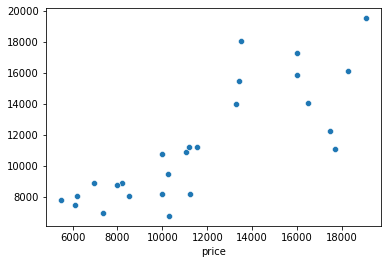

In [219]:
sns.scatterplot(y_test["price"],y_predict.ravel())
plt.show()

In [226]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_predict)

5789829.11940998

In [220]:
print(lmcars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     31.06
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           3.57e-34
Time:                        21:17:14   Log-Likelihood:                -1141.9
No. Observations:                 128   AIC:                             2320.
Df Residuals:                     110   BIC:                             2371.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.483e+04   1.77e+0